<a href="https://colab.research.google.com/github/robiul-islam-rubel/Internship_Iris-flower-classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load dataset
url = "/content/iris.csv"
data = pd.read_csv(url)

In [3]:
data.head()

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa

In [4]:
data.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [5]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [6]:
# select from 2nd column to rest of the column
data = data.iloc[:,1:]

In [7]:
data.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [8]:
data.rename(columns={'Sepal.Length':'sepallength','Sepal.Width':'sepalwidth','Petal.Length':'petallength','Petal.Width':'petalwidth','Species':'class'},inplace=True)

In [9]:
data.head()

sepallength  sepalwidth  petallength  petalwidth   class
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['class'])
data['class'] = le.transform(data['class'])

In [11]:
data.head()

sepallength  sepalwidth  petallength  petalwidth  class
0          5.1         3.5          1.4         0.2      0
1          4.9         3.0          1.4         0.2      0
2          4.7         3.2          1.3         0.2      0
3          4.6         3.1          1.5         0.2      0
4          5.0         3.6          1.4         0.2      0

In [12]:
data.shape

(150, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
data.describe()

sepallength  sepalwidth  petallength  petalwidth       class
count   150.000000  150.000000   150.000000  150.000000  150.000000
mean      5.843333    3.057333     3.758000    1.199333    1.000000
std       0.828066    0.435866     1.765298    0.762238    0.819232
min       4.300000    2.000000     1.000000    0.100000    0.000000
25%       5.100000    2.800000     1.600000    0.300000    0.000000
50%       5.800000    3.000000     4.350000    1.300000    1.000000
75%       6.400000    3.300000     5.100000    1.800000    2.000000
max       7.900000    4.400000     6.900000    2.500000    2.000000

In [15]:
data.value_counts()

sepallength  sepalwidth  petallength  petalwidth  class
5.8          2.7         5.1          1.9         2        2
6.2          2.2         4.5          1.5         1        1
             2.9         4.3          1.3         1        1
             3.4         5.4          2.3         2        1
6.3          2.3         4.4          1.3         1        1
                                                          ..
5.4          3.9         1.3          0.4         0        1
                         1.7          0.4         0        1
5.5          2.3         4.0          1.3         1        1
             2.4         3.7          1.0         1        1
7.9          3.8         6.4          2.0         2        1
Length: 149, dtype: int64

In [16]:
data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [17]:
n = len(data[data['class'] == 0])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [18]:
n = len(data[data['class'] == 1])
print("No of Virginica in Dataset:",n)

No of Virginica in Dataset: 50


In [19]:
n = len(data[data['class'] == 2])
print("No of Setosa in Dataset:",n)

No of Setosa in Dataset: 50


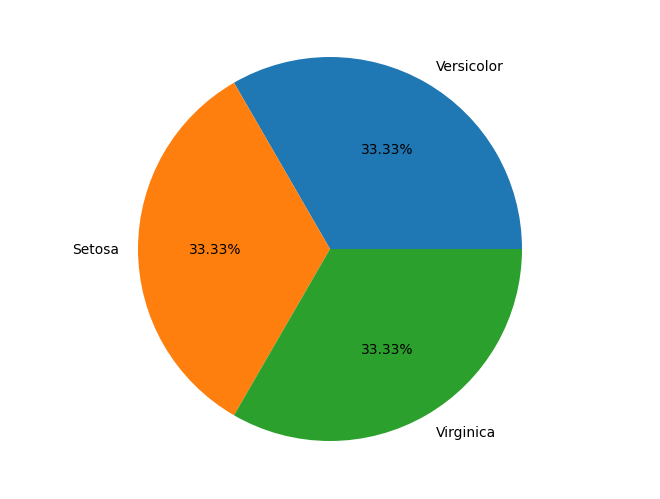

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop("class",axis=1)
y = data['class']

In [23]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [26]:
print(f"X data type: {X.dtypes}")
print(f"y data type: {y.dtypes}")

X data type: sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
dtype: object
y data type: int64


In [27]:
X = X.astype(float)
y = y.astype(float)

In [29]:
features = ['sepallength','sepalwidth','petallength','petalwidth']

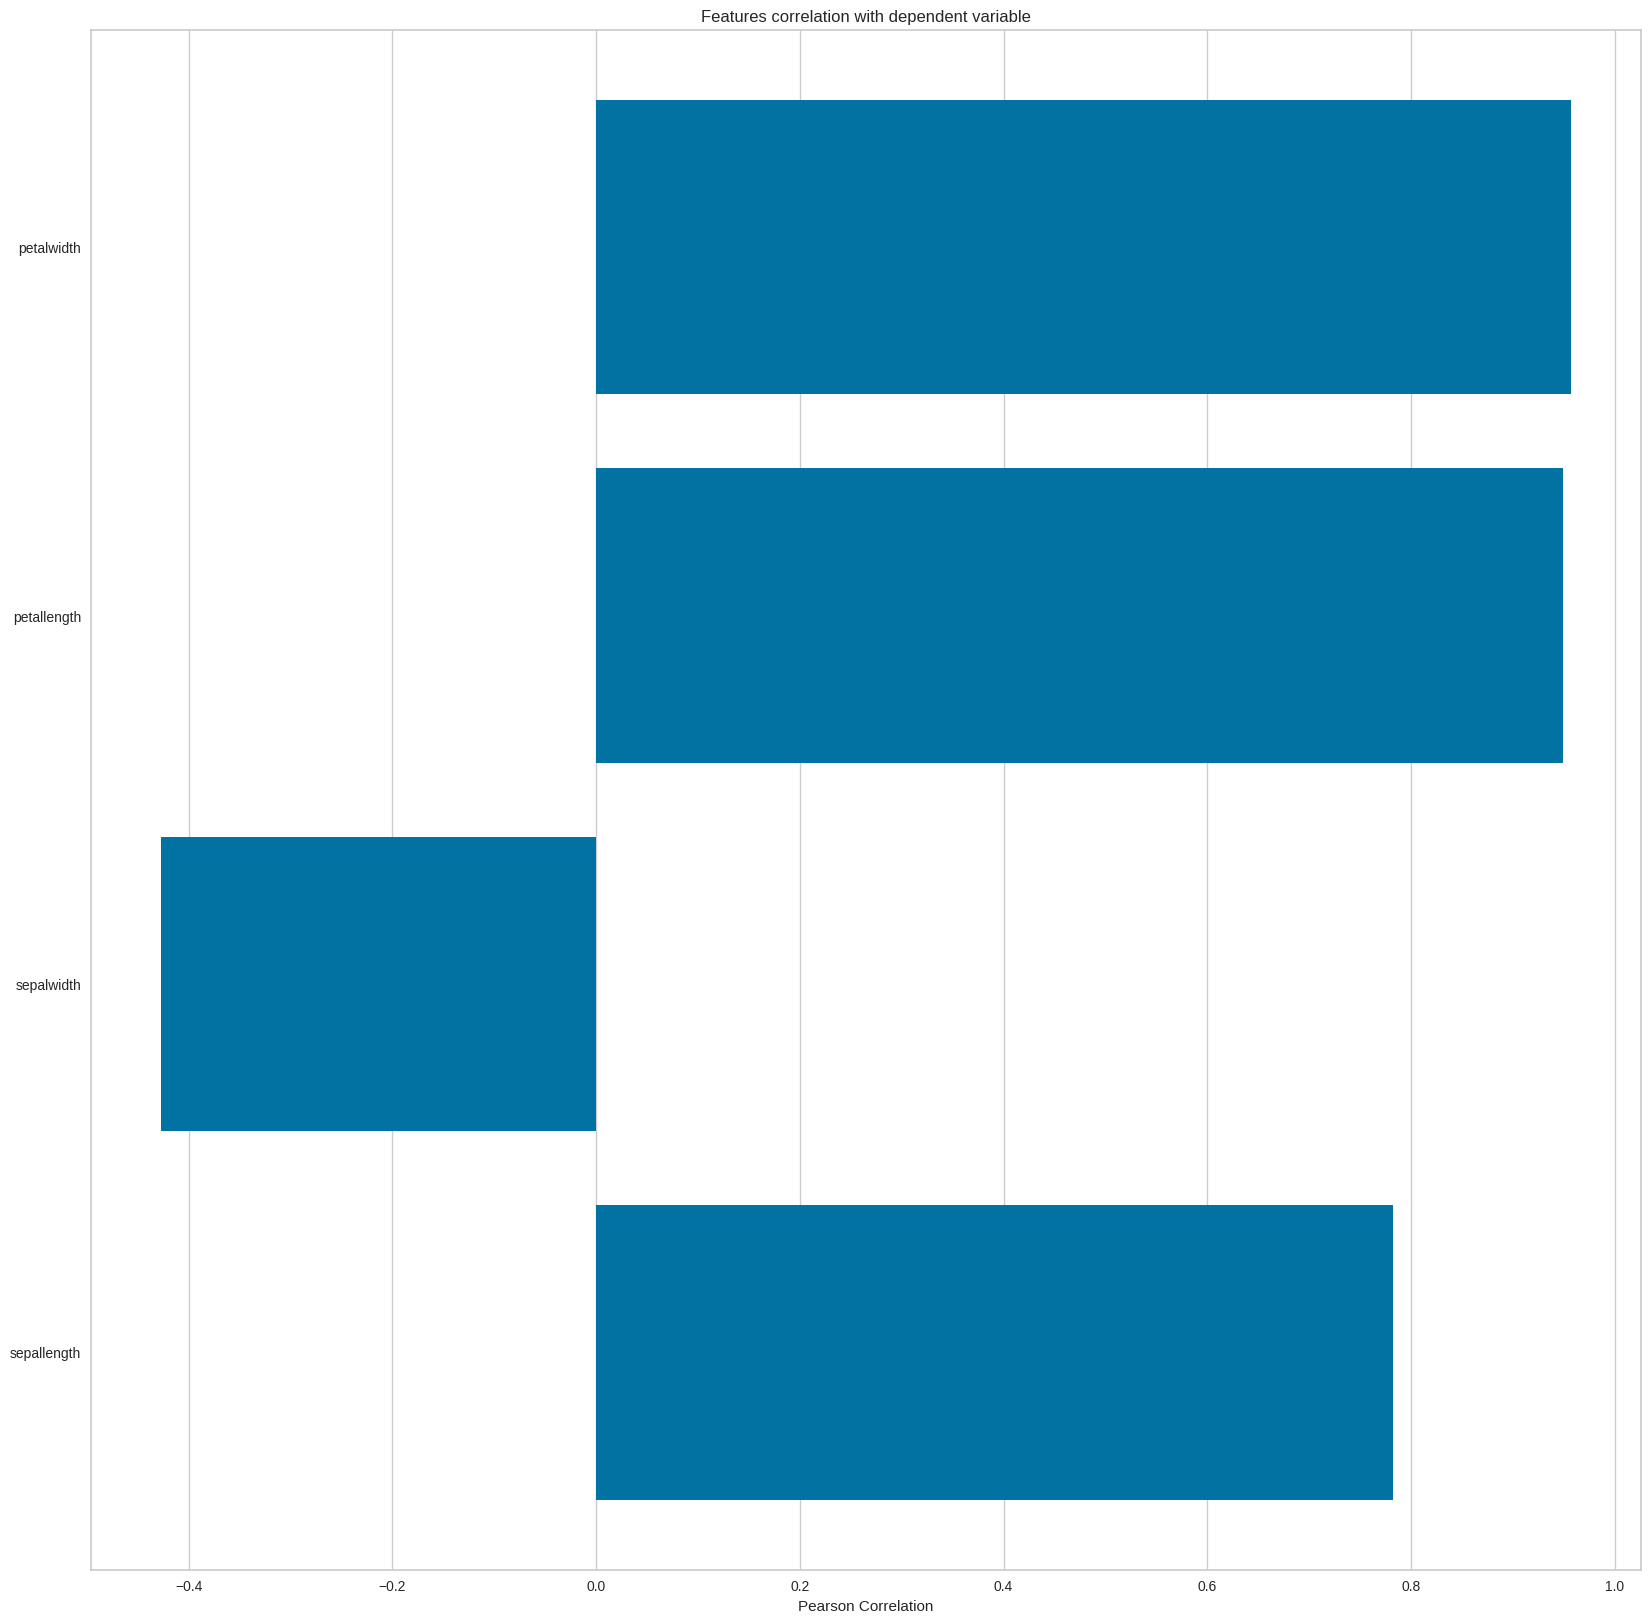

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [30]:
from yellowbrick.target import FeatureCorrelation
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [31]:
!pip install shap

In [32]:
import xgboost

import shap

# train XGBoost model
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

In [34]:
print(shap_values.shape)

(150, 4, 3)


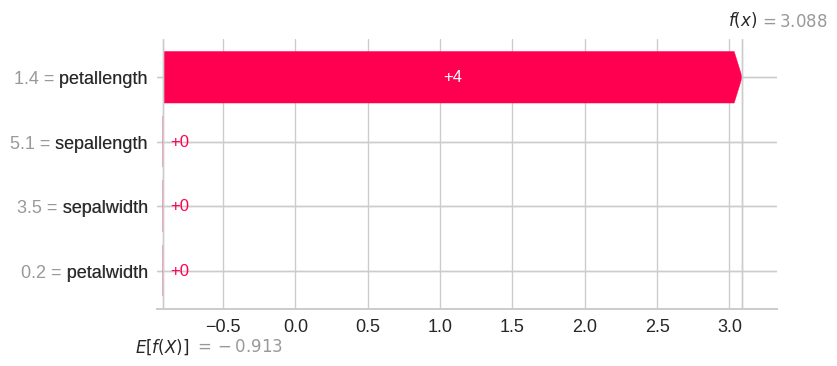

In [40]:
shap.plots.waterfall(shap_values[0, :, 0])

In [48]:
import plotly.express as px
fig = px.line(data, x='class', y=features)
fig.show()

In [67]:
# Visualizing the Clusters with t-SNE

# Visualizing the Clusters with t-SNE
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['petallength', 'sepallength'], data=genre_embedding)
projection['class'] = data['class']
projection['class'] = data['class']
fig = px.scatter(
    projection, x='petallength', y='sepallength', color='class', hover_data=['petallength', 'sepallength', 'class'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.694516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.181202
[t-SNE] KL divergence after 1000 iterations: 0.148529


In [77]:
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma

In [84]:
fig = px.line(data, y='class', color='class')
fig.show()

In [85]:
fig = px.bar(data, x='class', y='petallength', color='class')
fig.show()

In [86]:
fig = px.histogram(data, x='class', color='class')
fig.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



<Axes: xlabel='sepallength', ylabel='sepalwidth'>

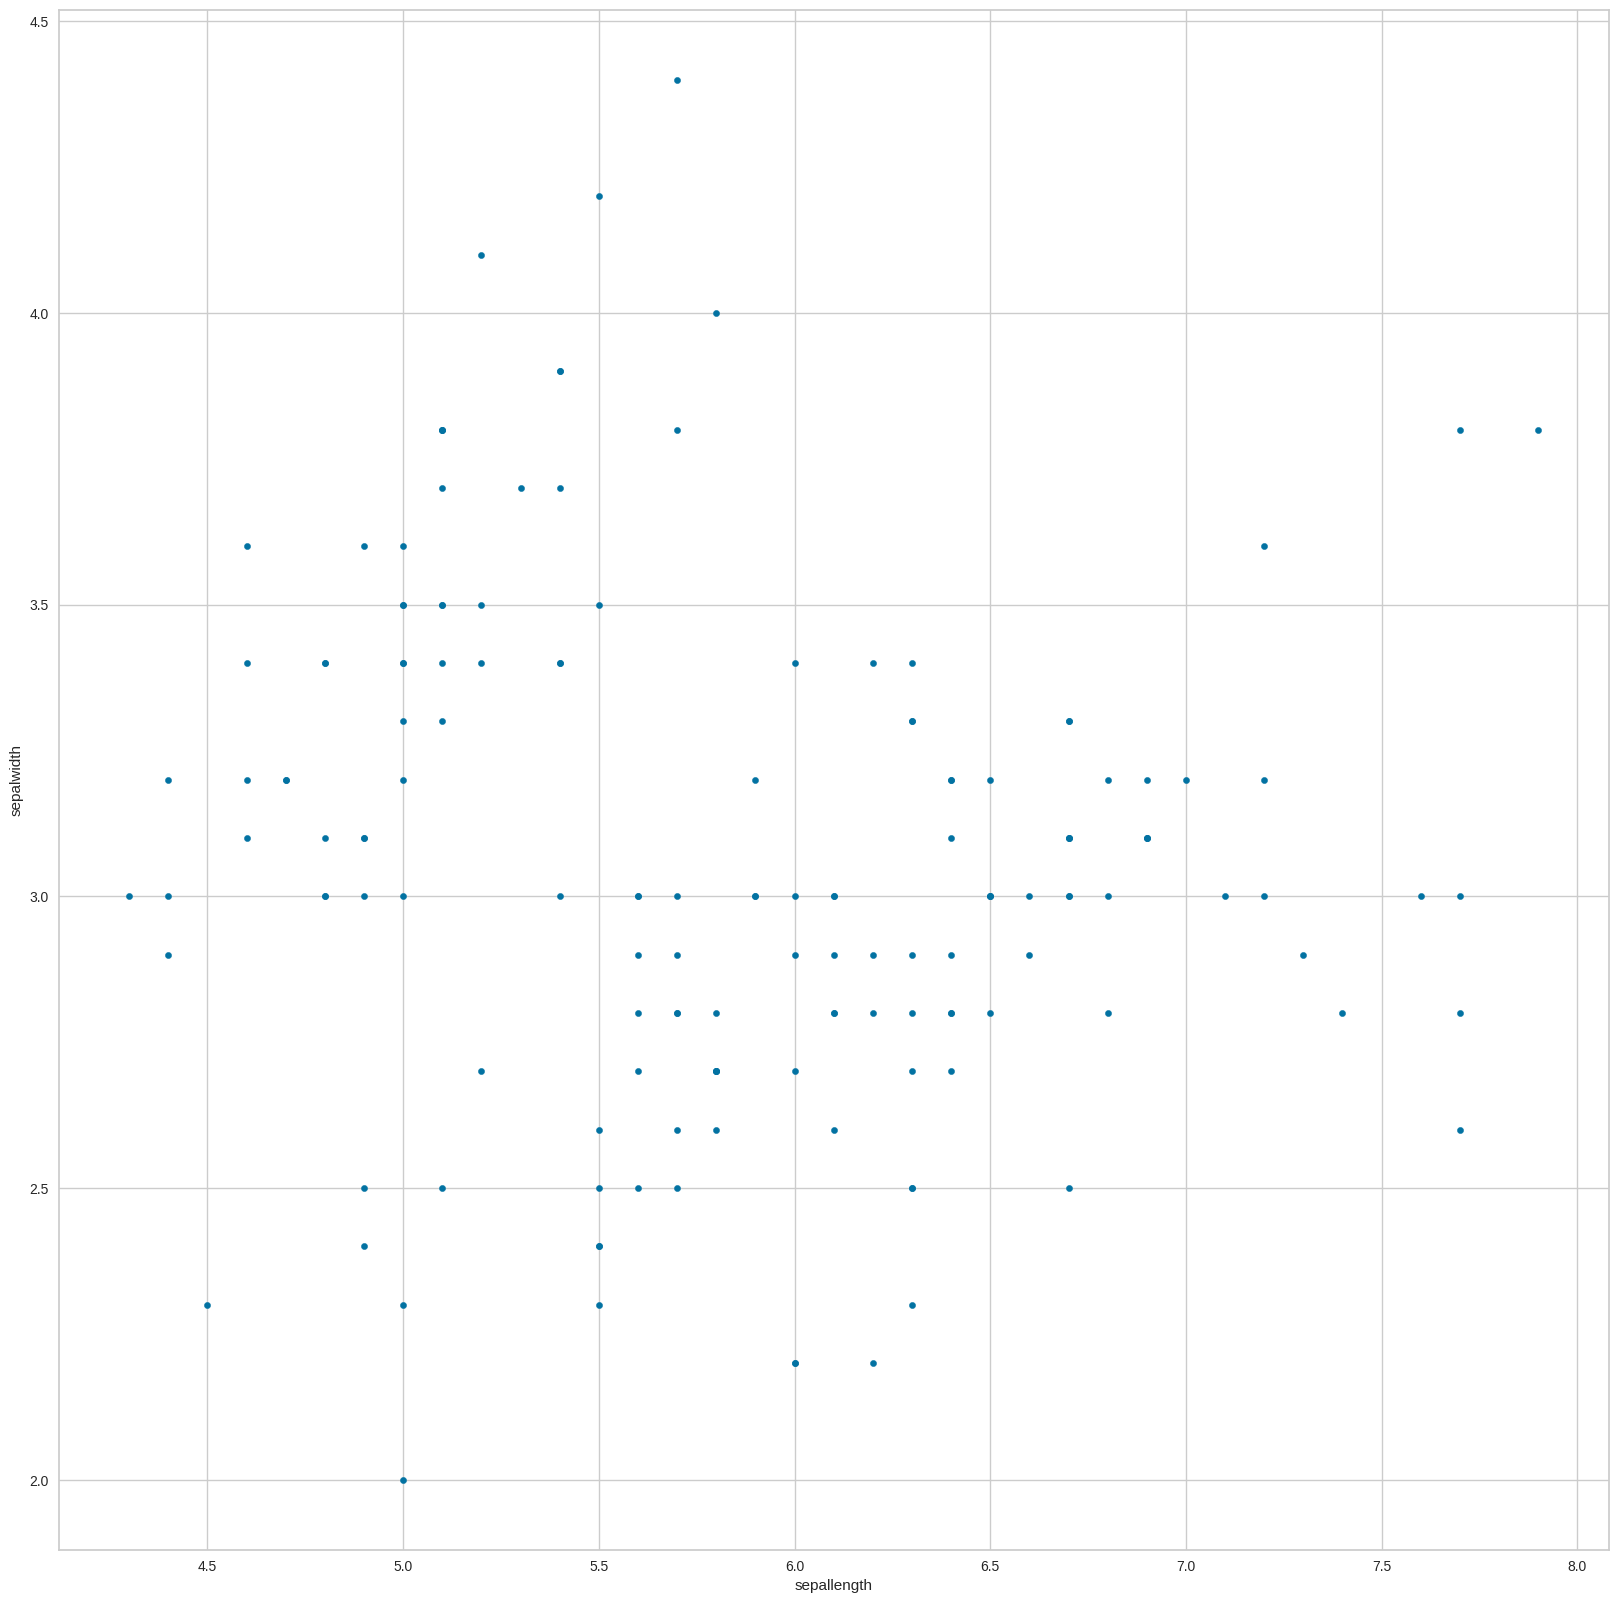

In [90]:
data.plot(kind="scatter", x="sepallength", y="sepalwidth")

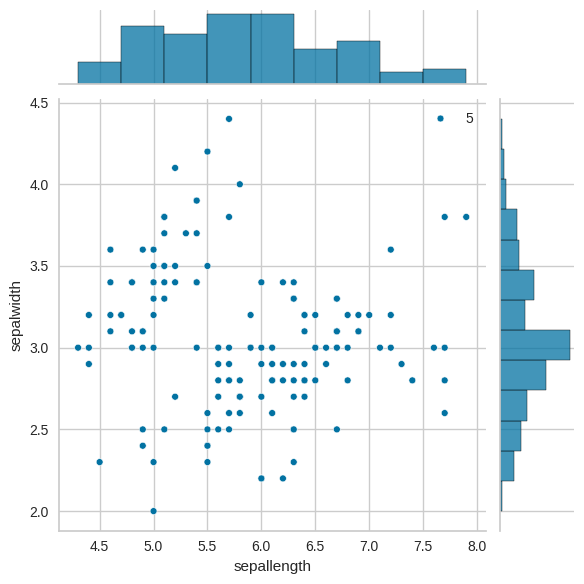

In [91]:
sns.jointplot(x="sepallength", y="sepalwidth", data=data, size=5)

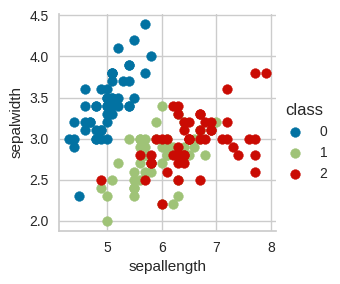

In [95]:
sns.FacetGrid(data, hue="class") \
   .map(plt.scatter, "sepallength", "sepalwidth") \
   .add_legend()

<Axes: xlabel='class', ylabel='petallength'>

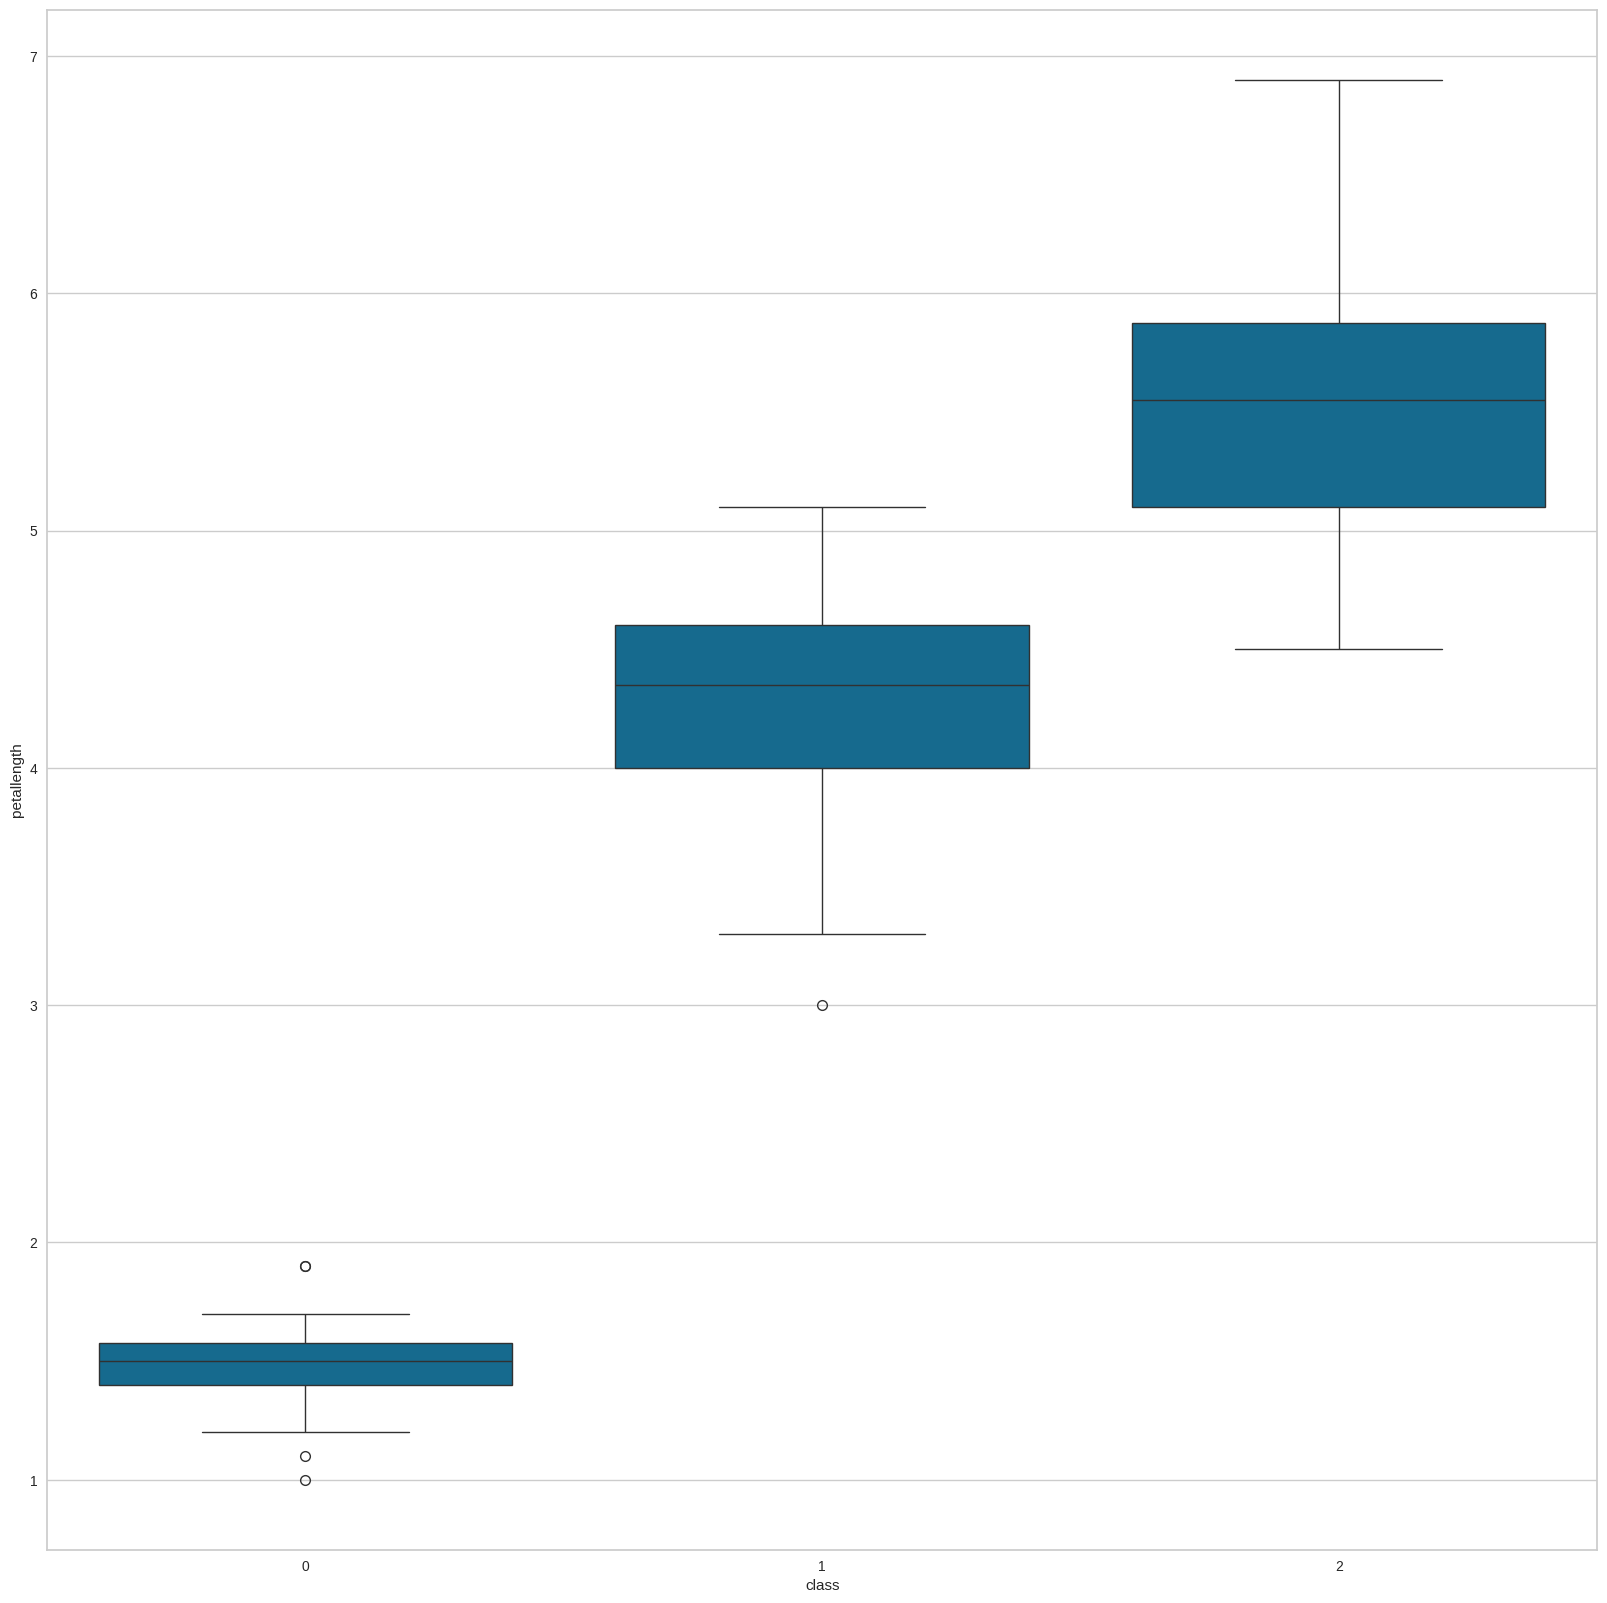

In [96]:
sns.boxplot(x="class", y="petallength", data=data)

<Axes: xlabel='class', ylabel='petallength'>

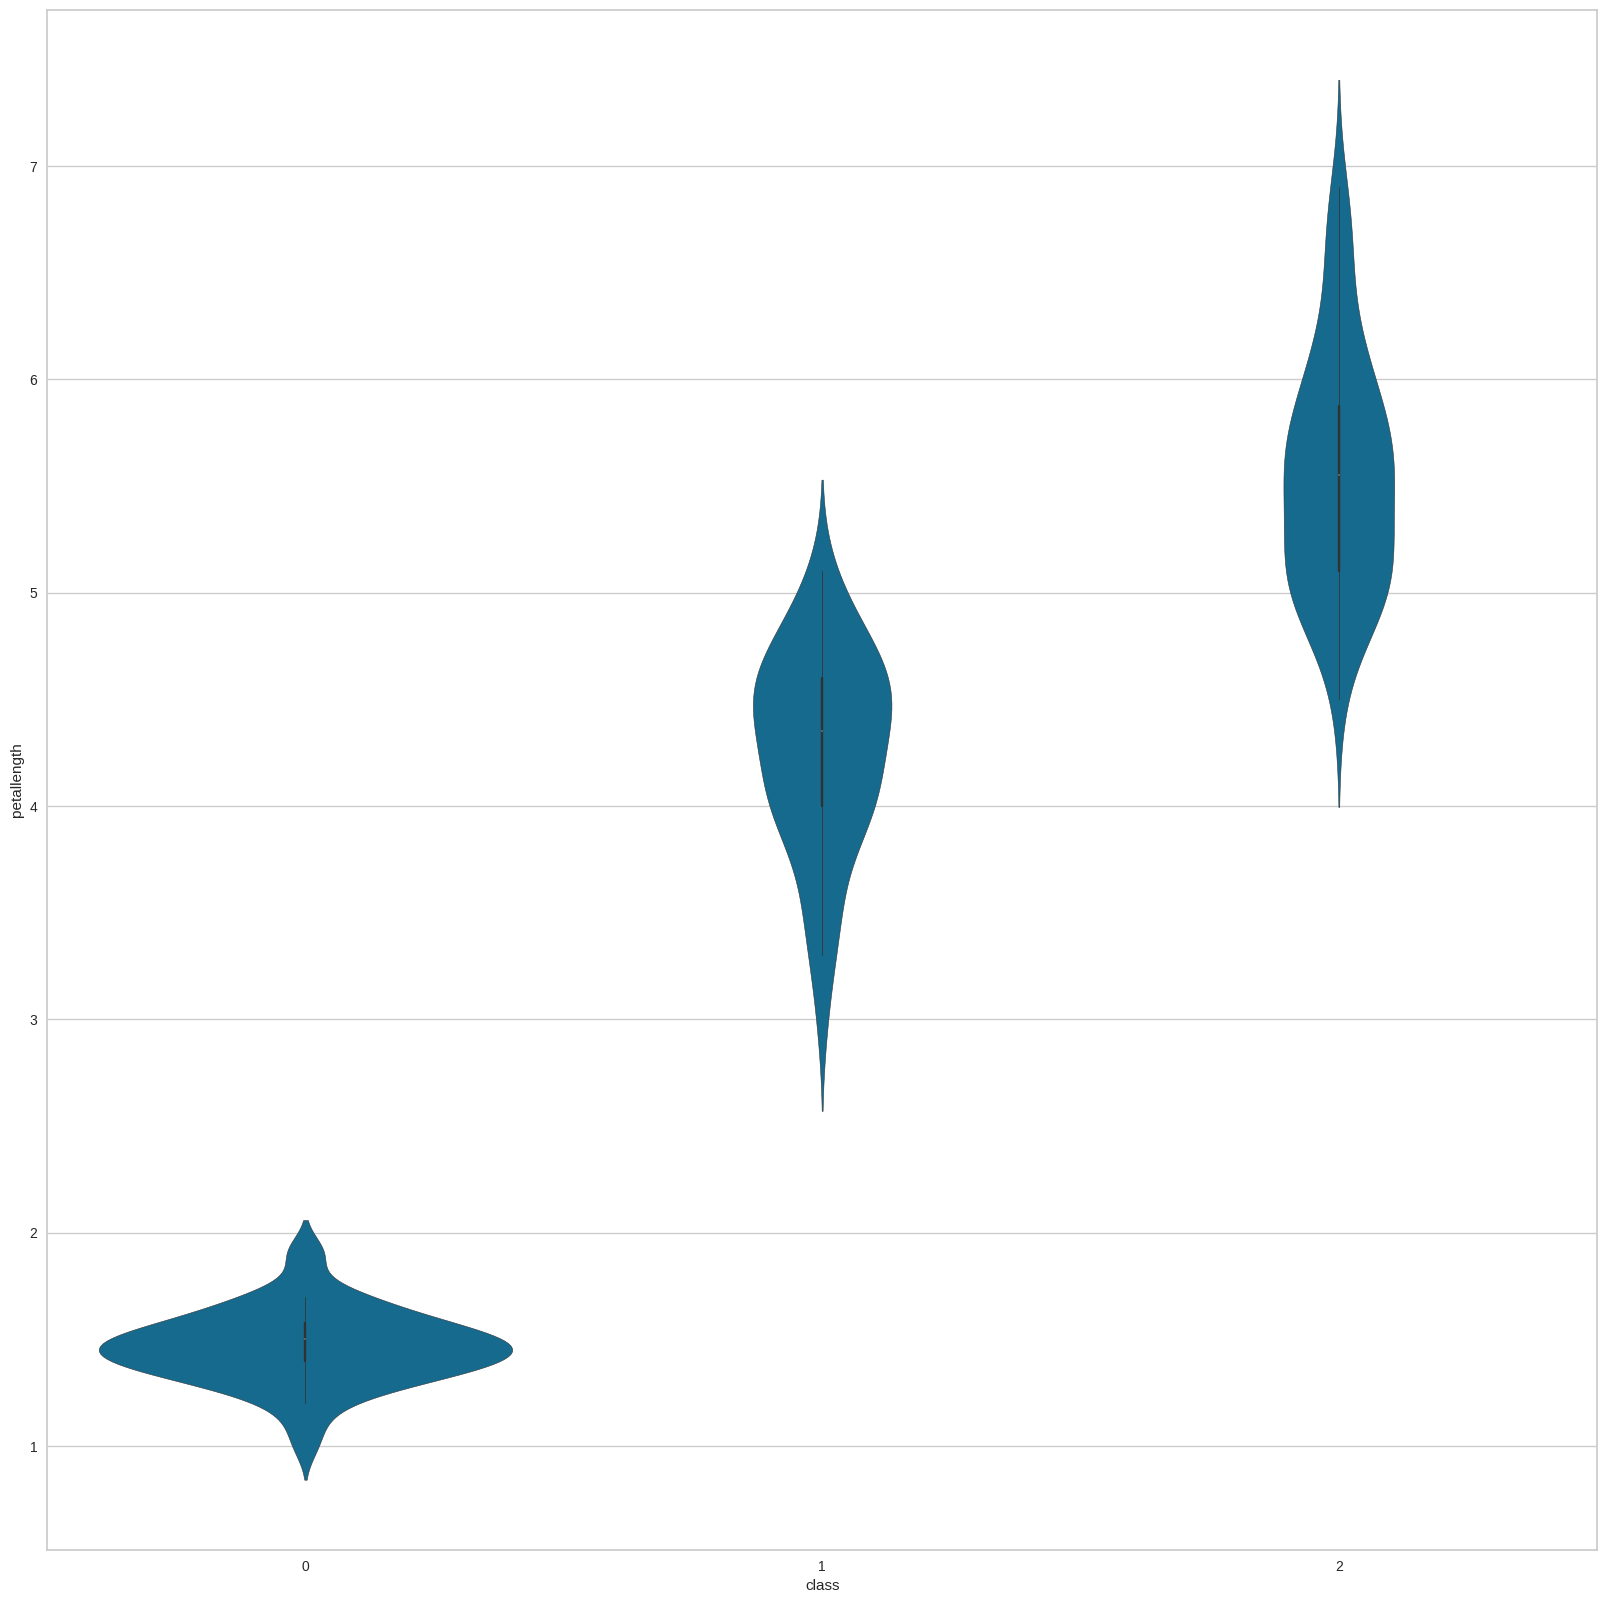

In [98]:
sns.violinplot(x="class", y="petallength", data=data)

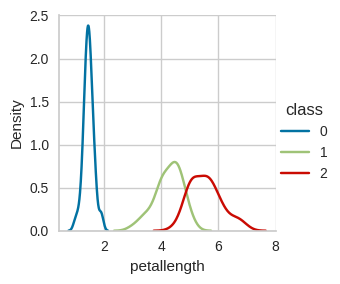

In [100]:
sns.FacetGrid(data, hue="class") \
   .map(sns.kdeplot, "petallength") \
   .add_legend()

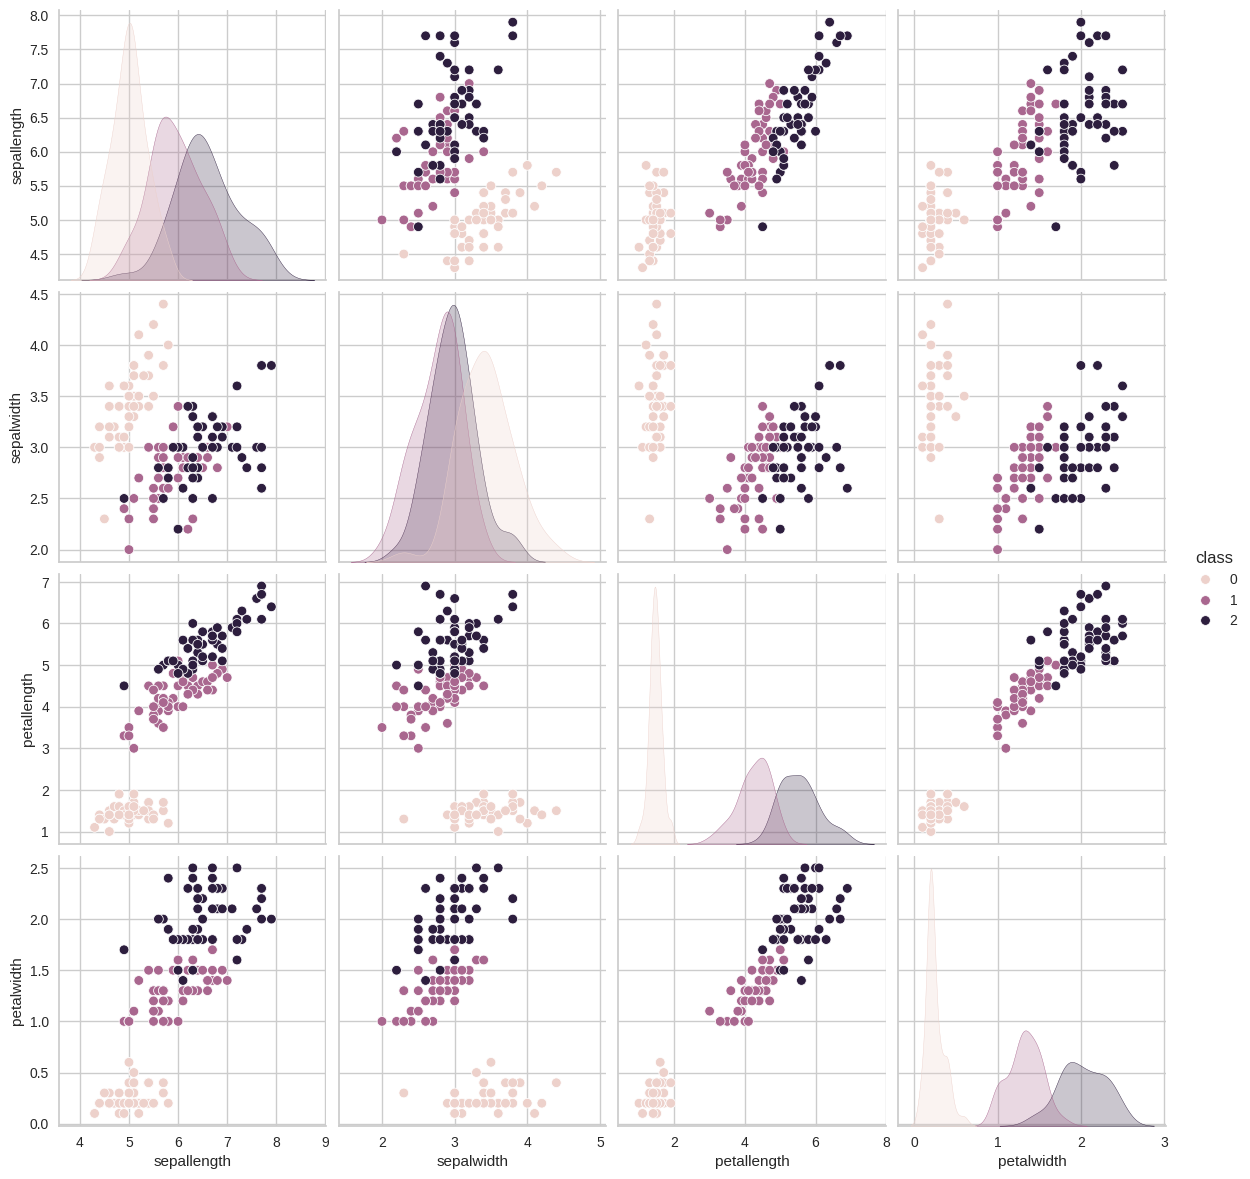

In [103]:
sns.pairplot(data, hue="class",height=3)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



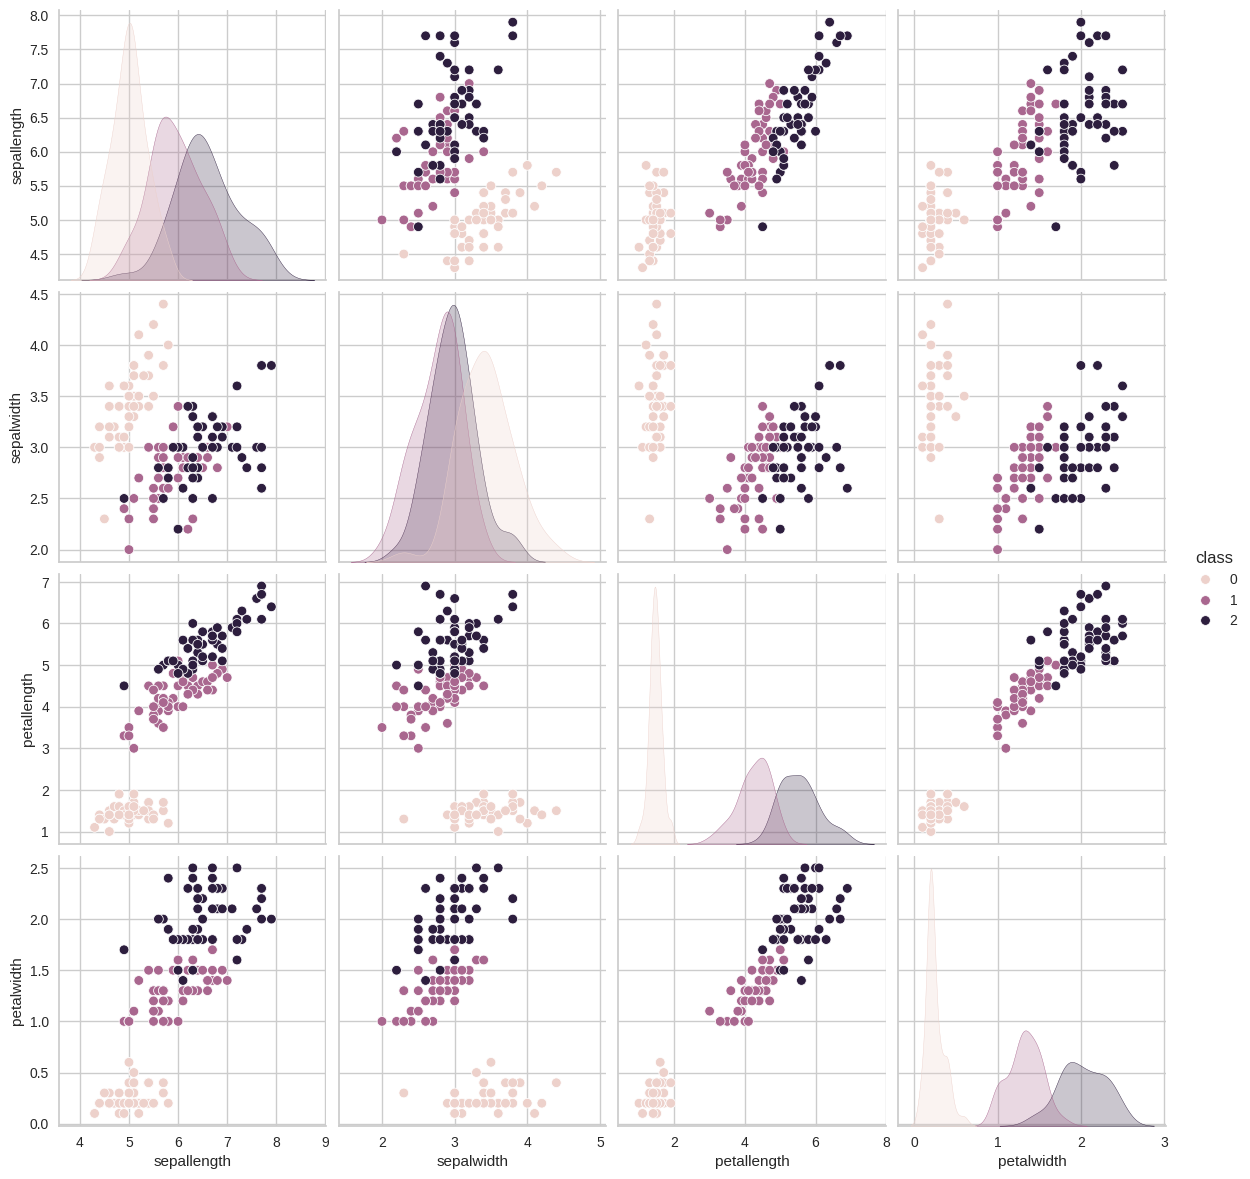

In [102]:
sns.pairplot(data, hue="class", height=3, diag_kind="kde")

<Axes: >

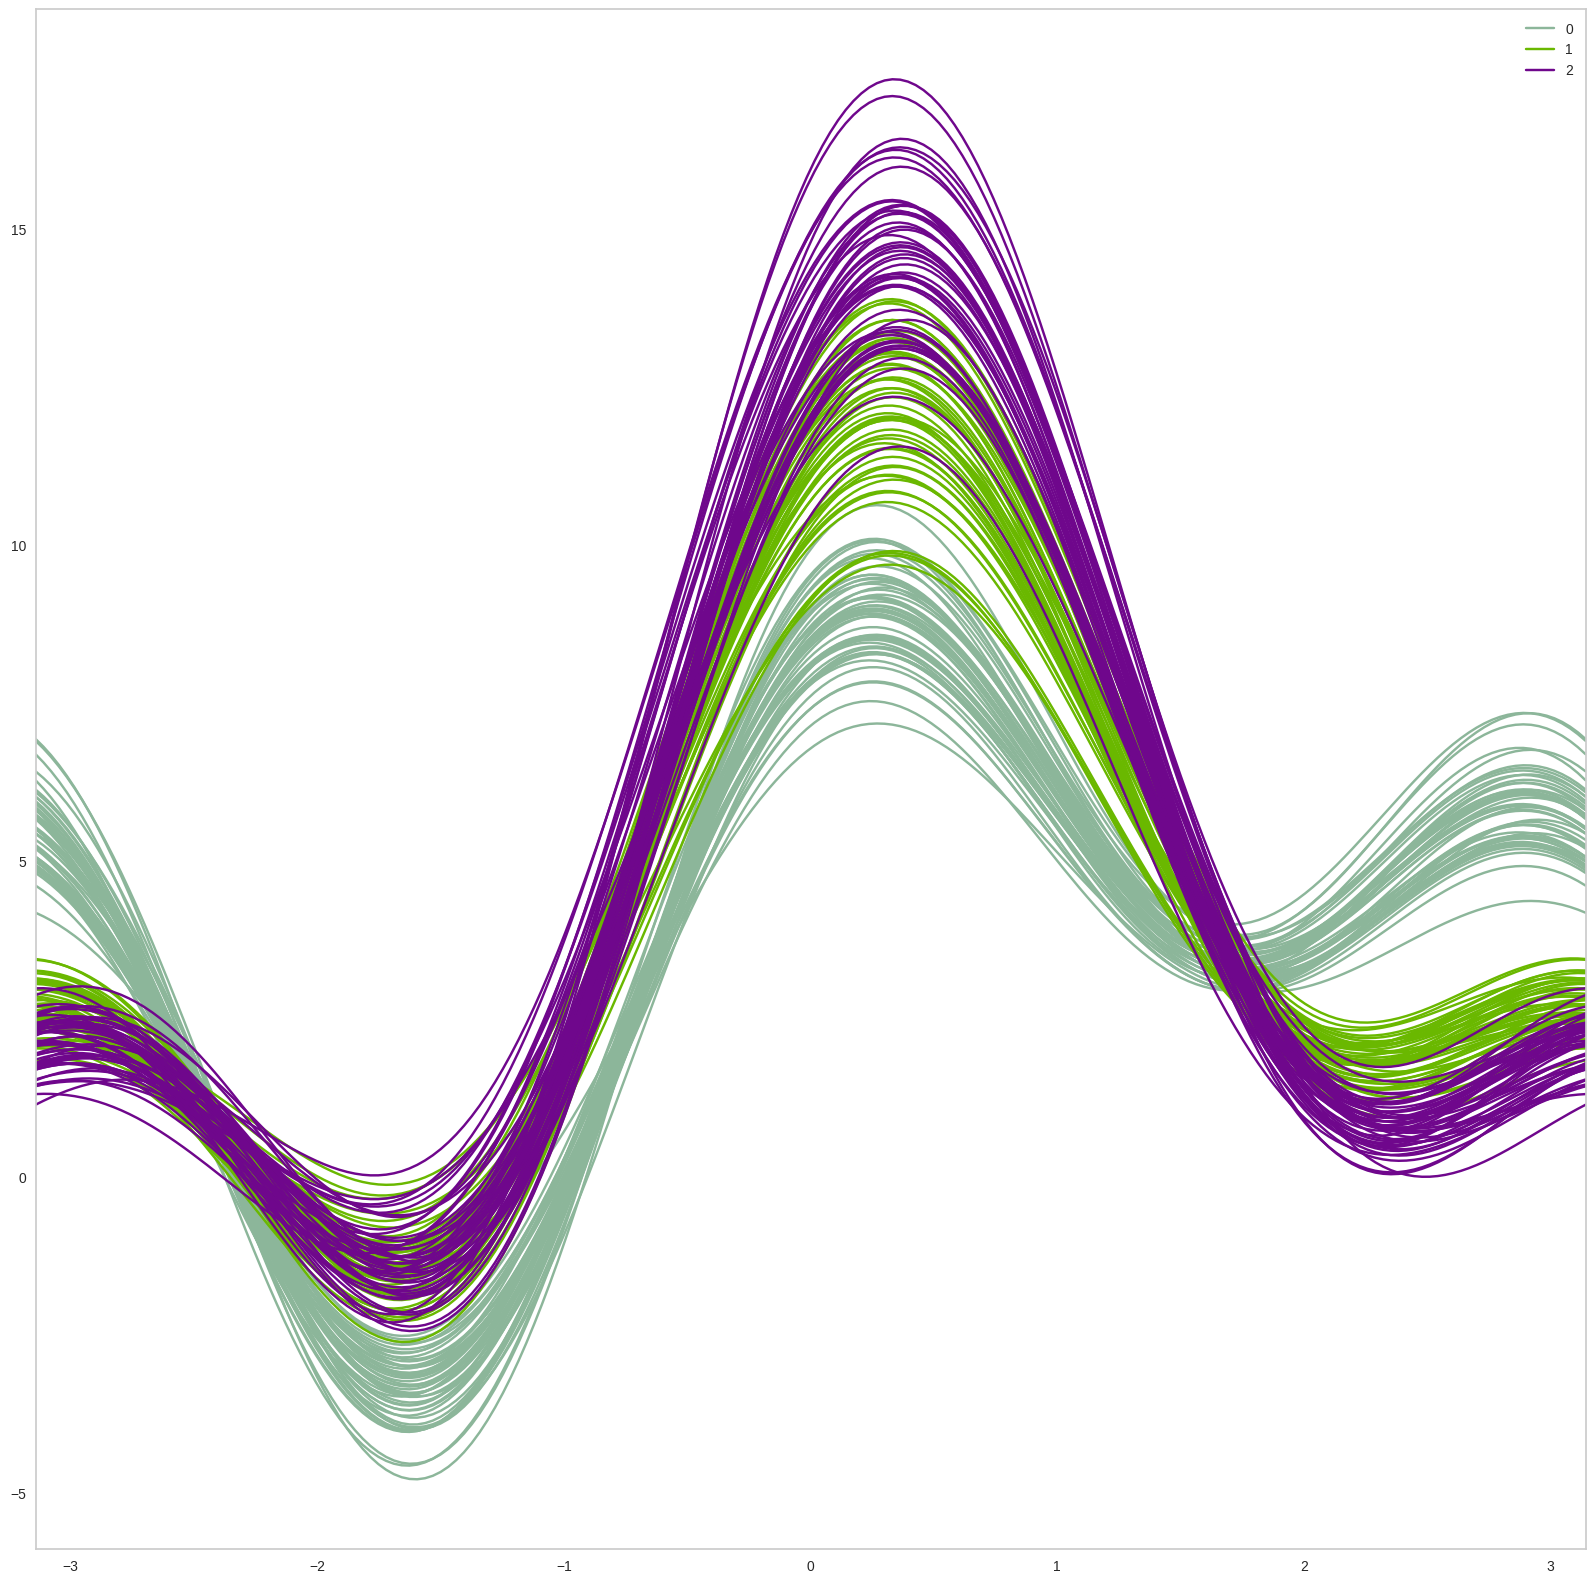

In [110]:
from pandas.plotting import andrews_curves,parallel_coordinates,radviz
andrews_curves(data, "class")

<Axes: >

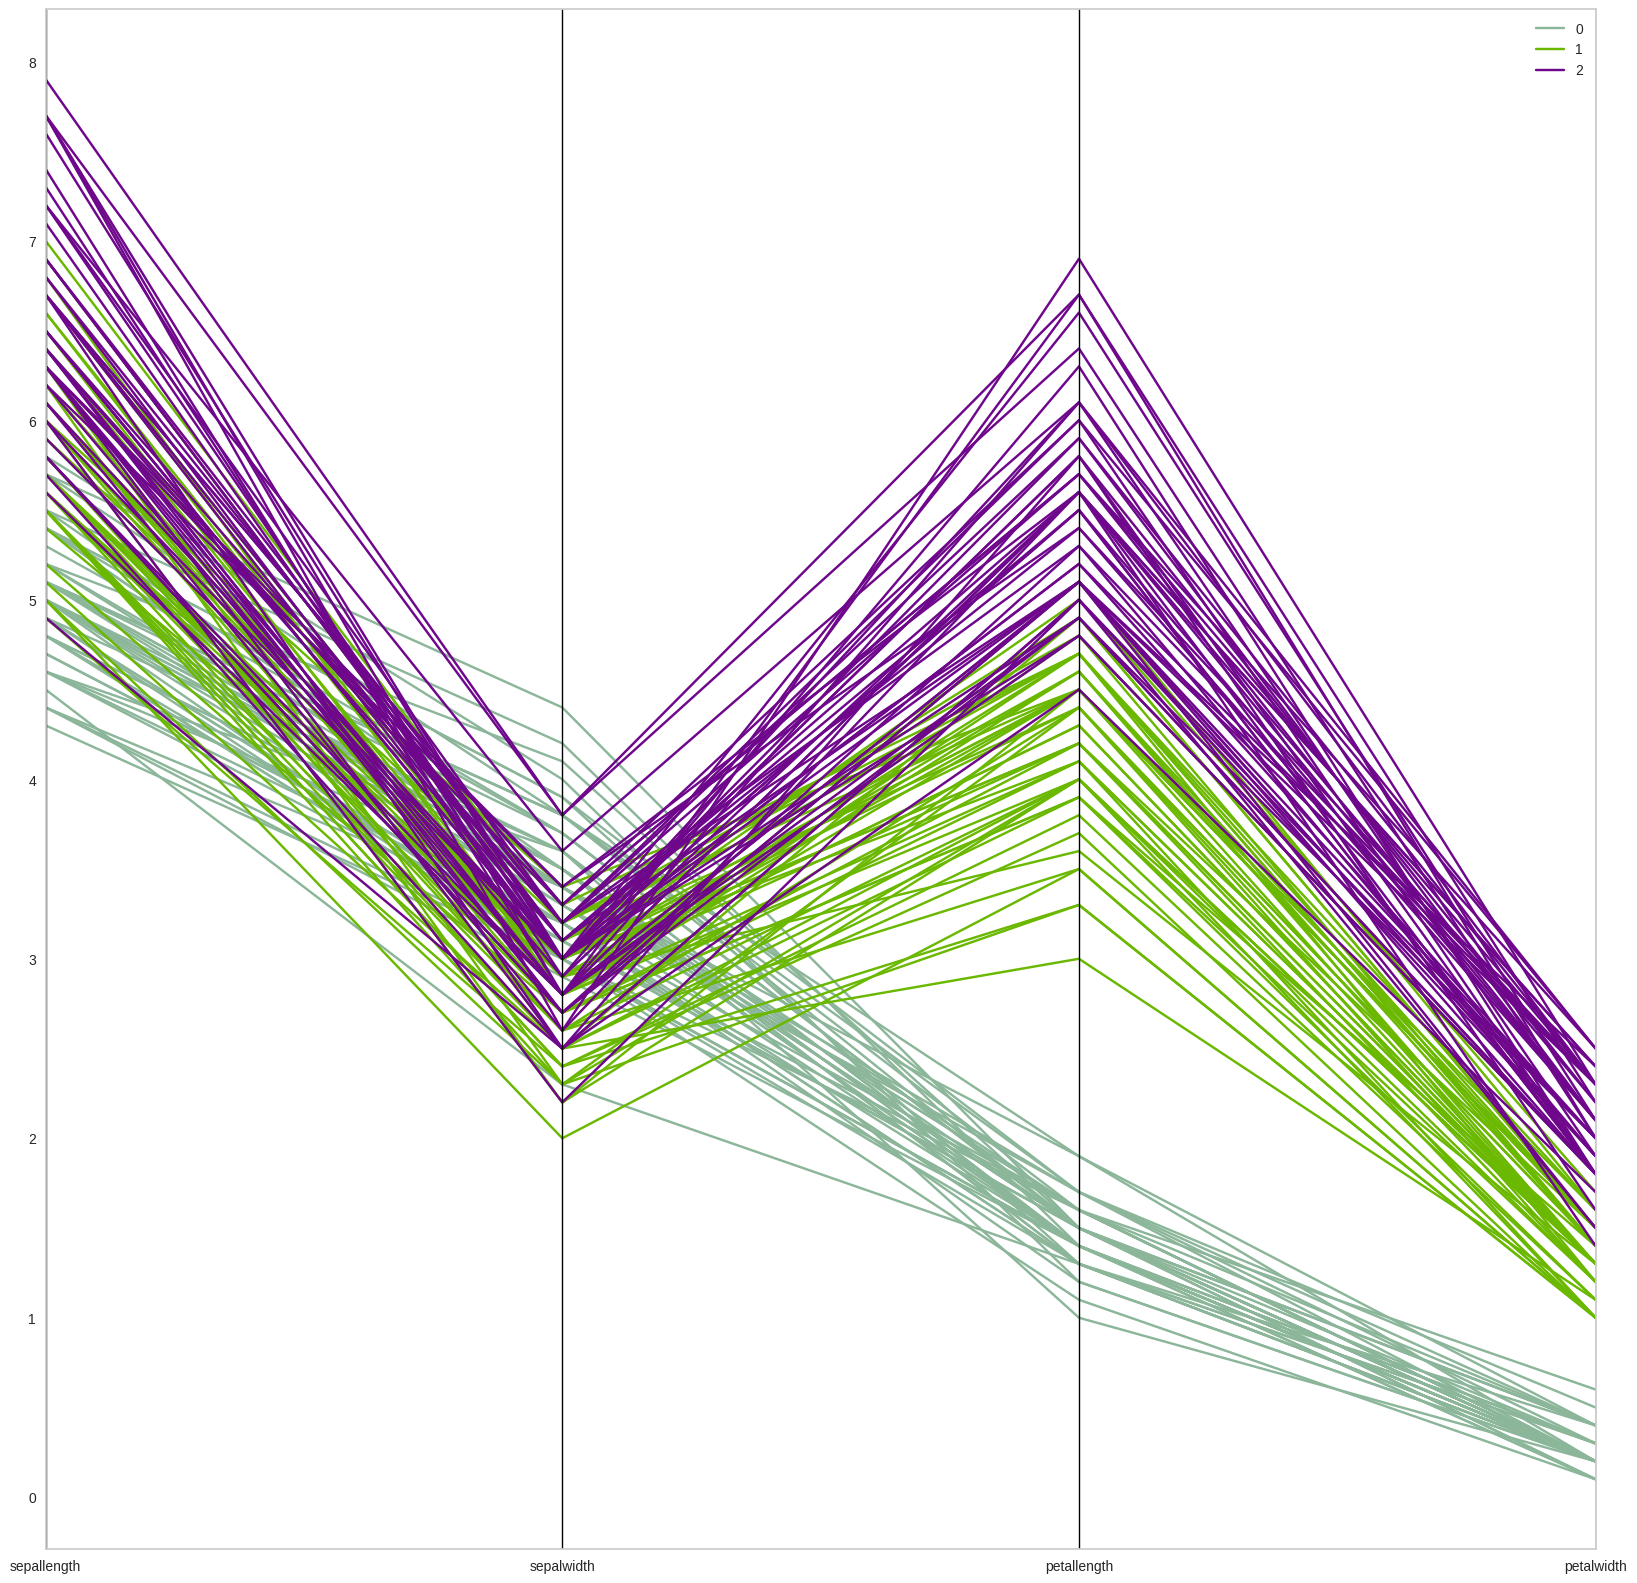

In [109]:
parallel_coordinates(data, "class")

<Axes: >

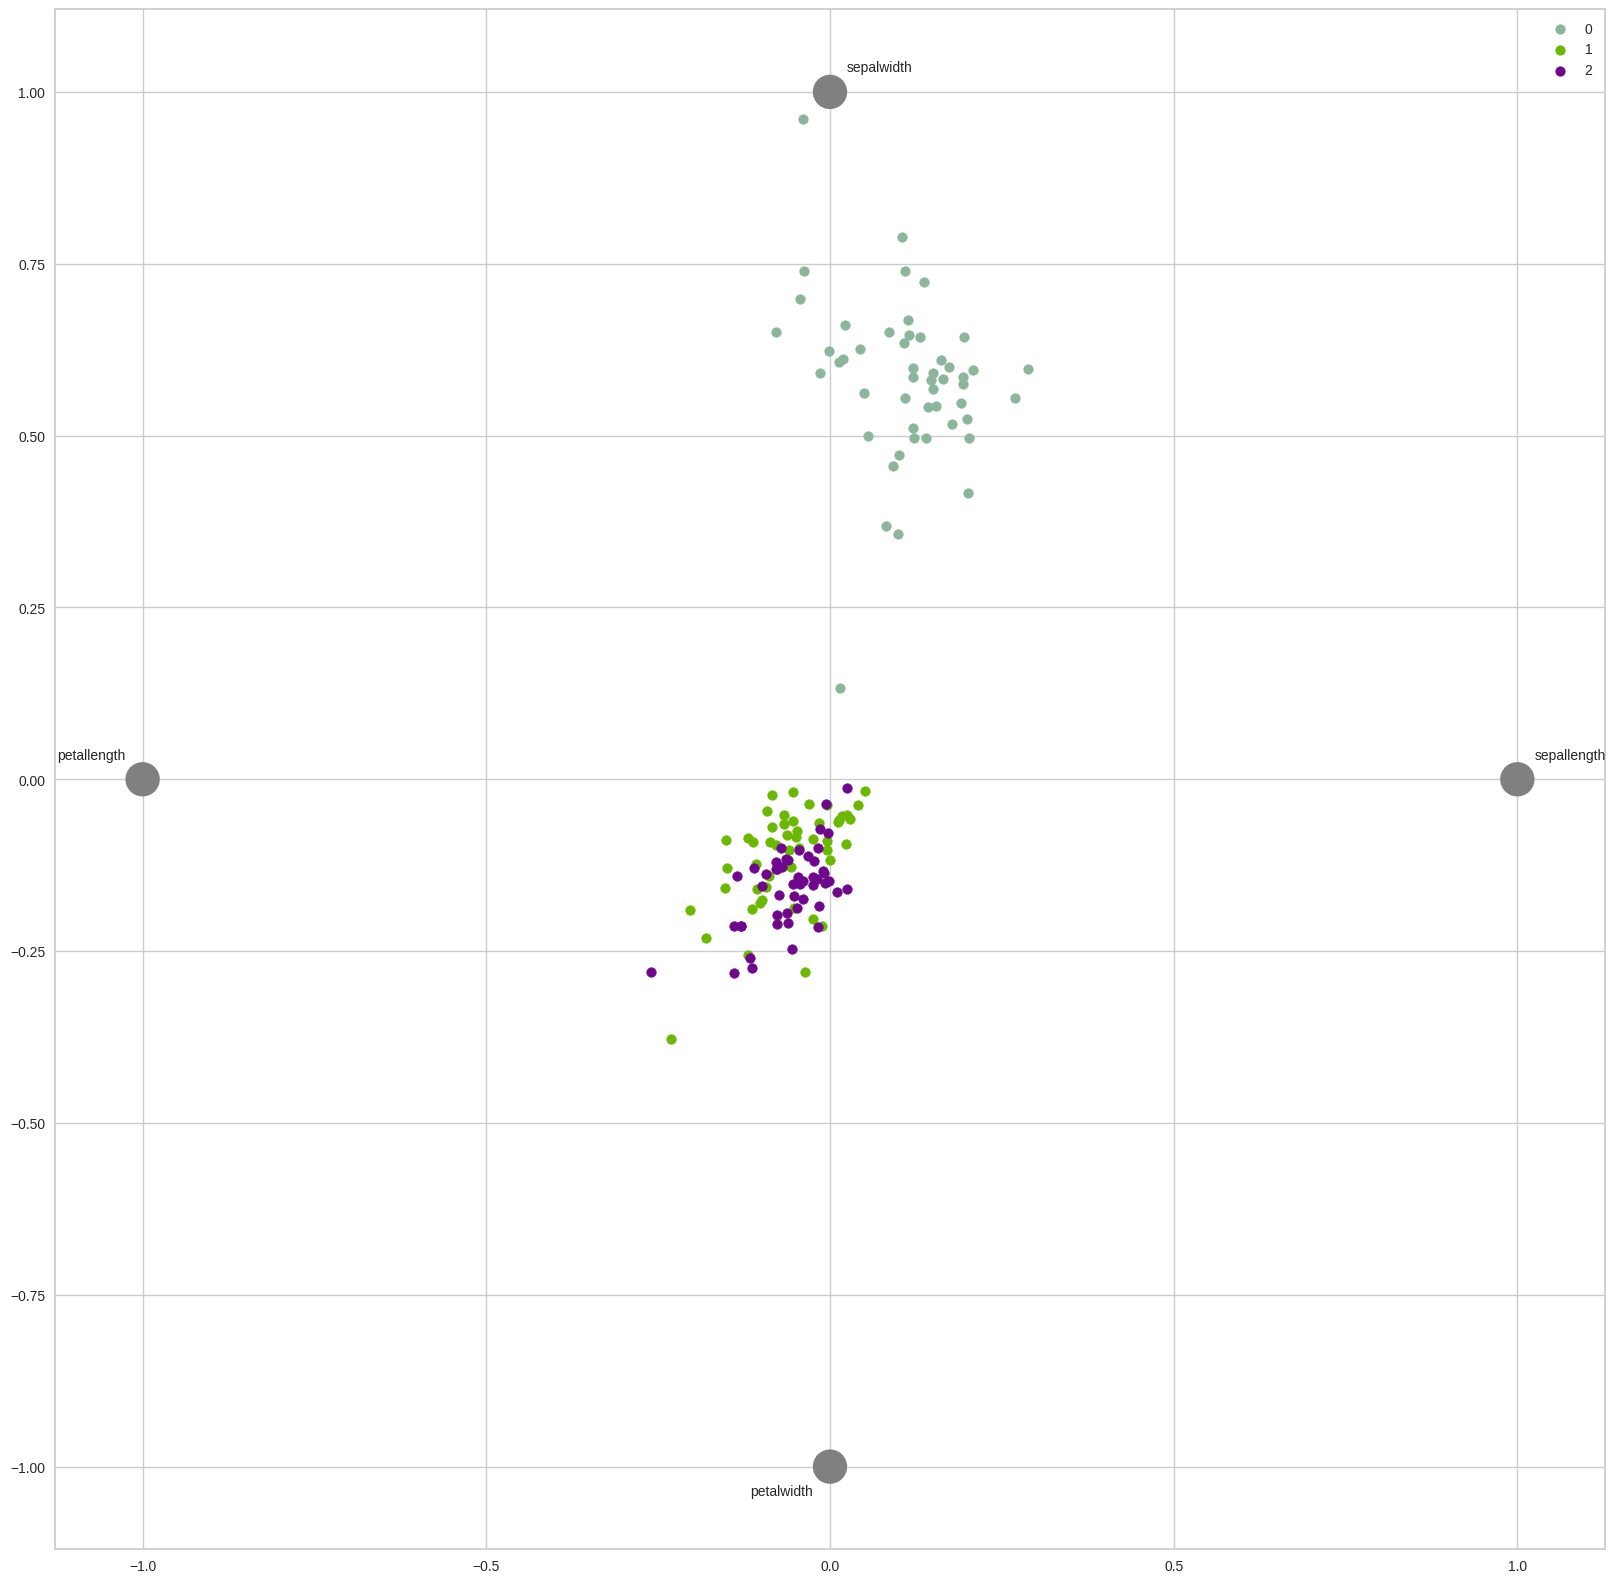

In [111]:
radviz(data, "class")


<ipython-input-112-312b8dd3c98b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='sepallength', ylabel='Density'>

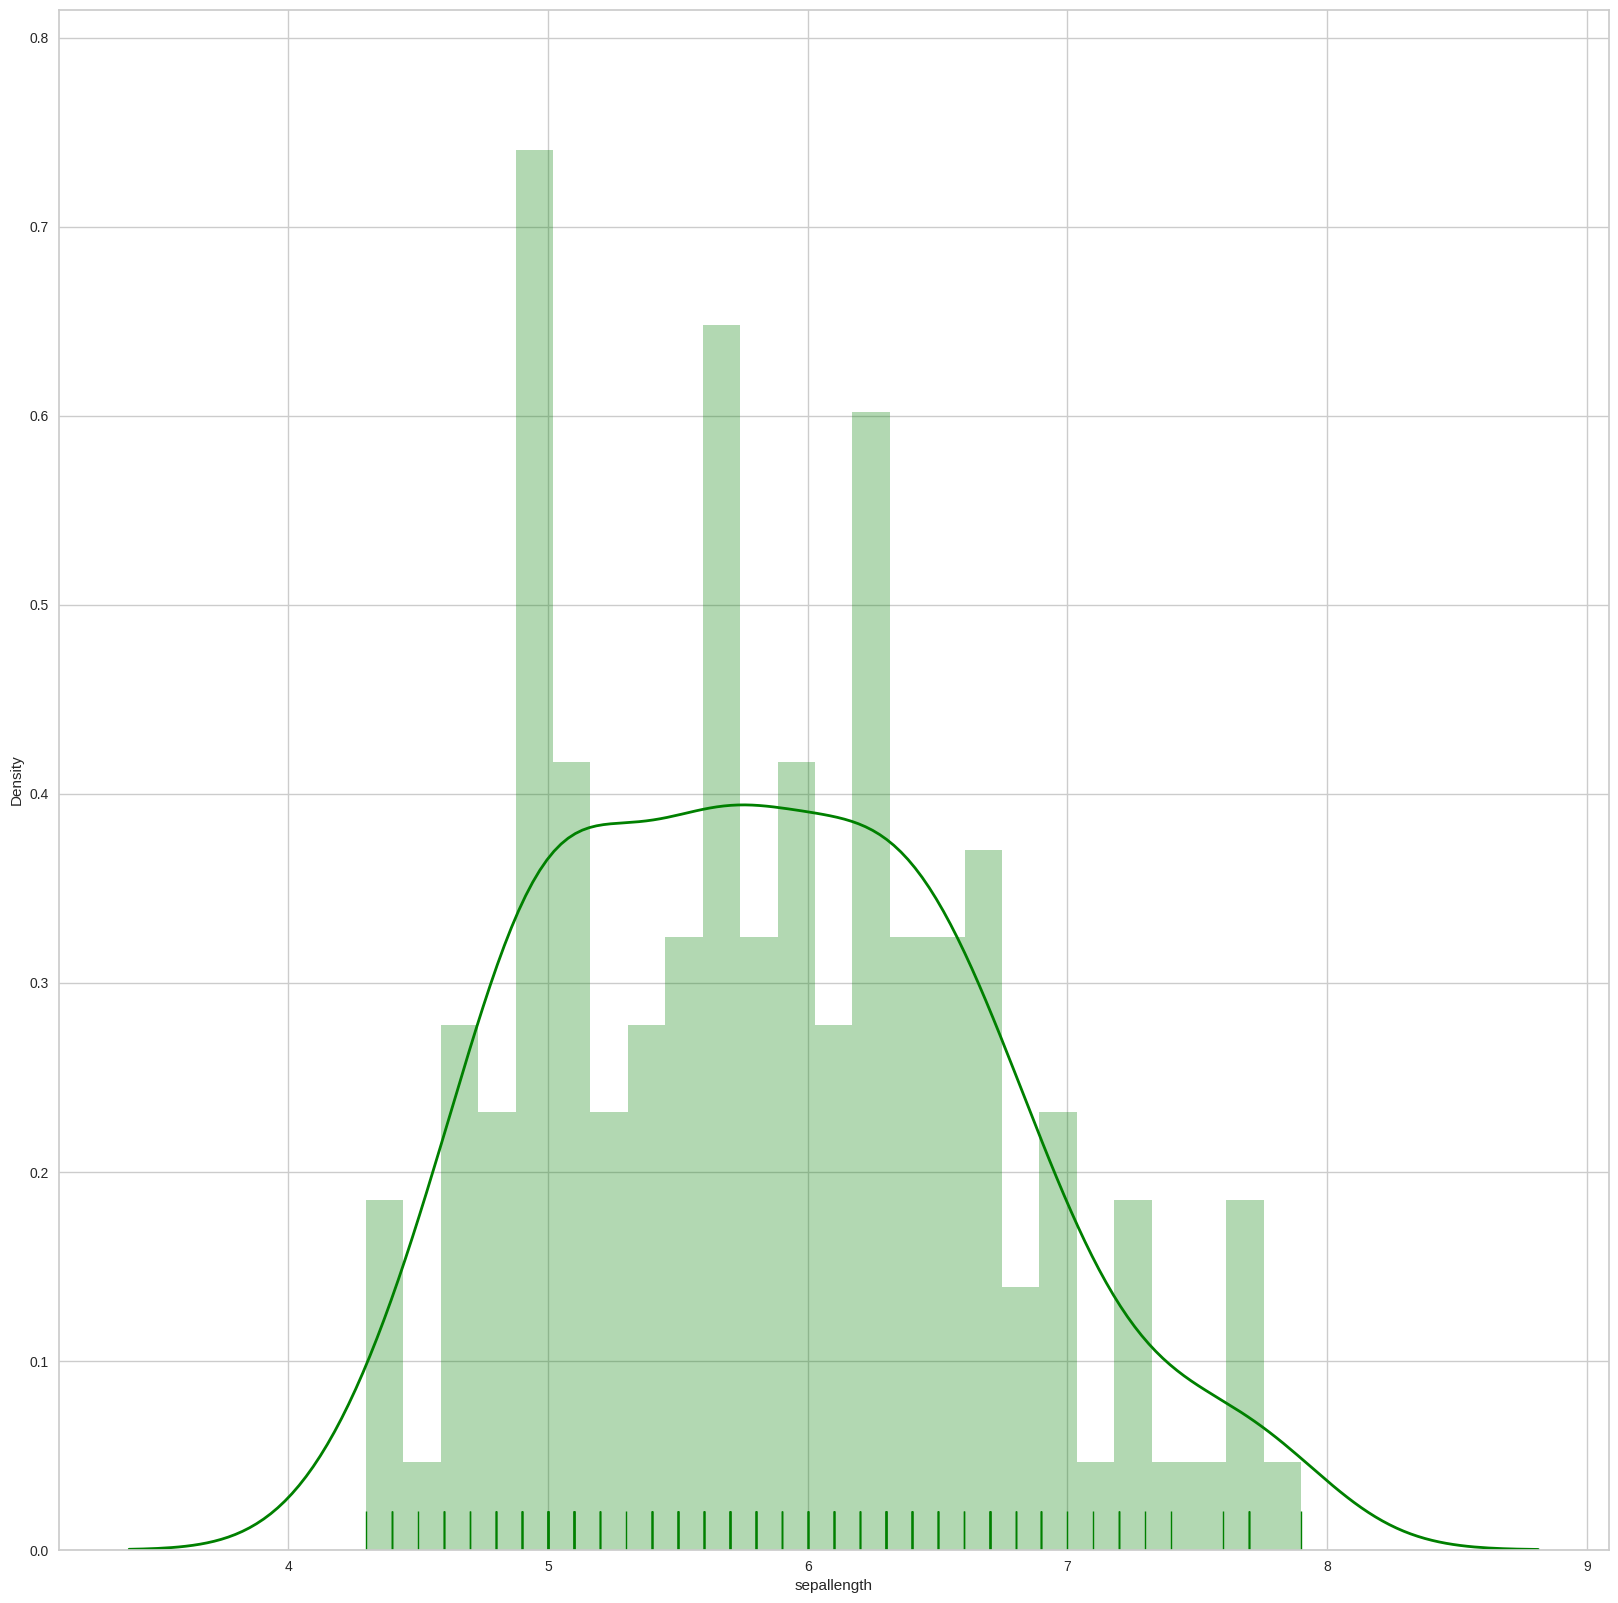

In [112]:
sns.distplot(data["sepallength"], bins = 25, kde = True,
             rug = True, color = "green", hist_kws = {"alpha":0.3},
             kde_kws = {"linewidth":2})

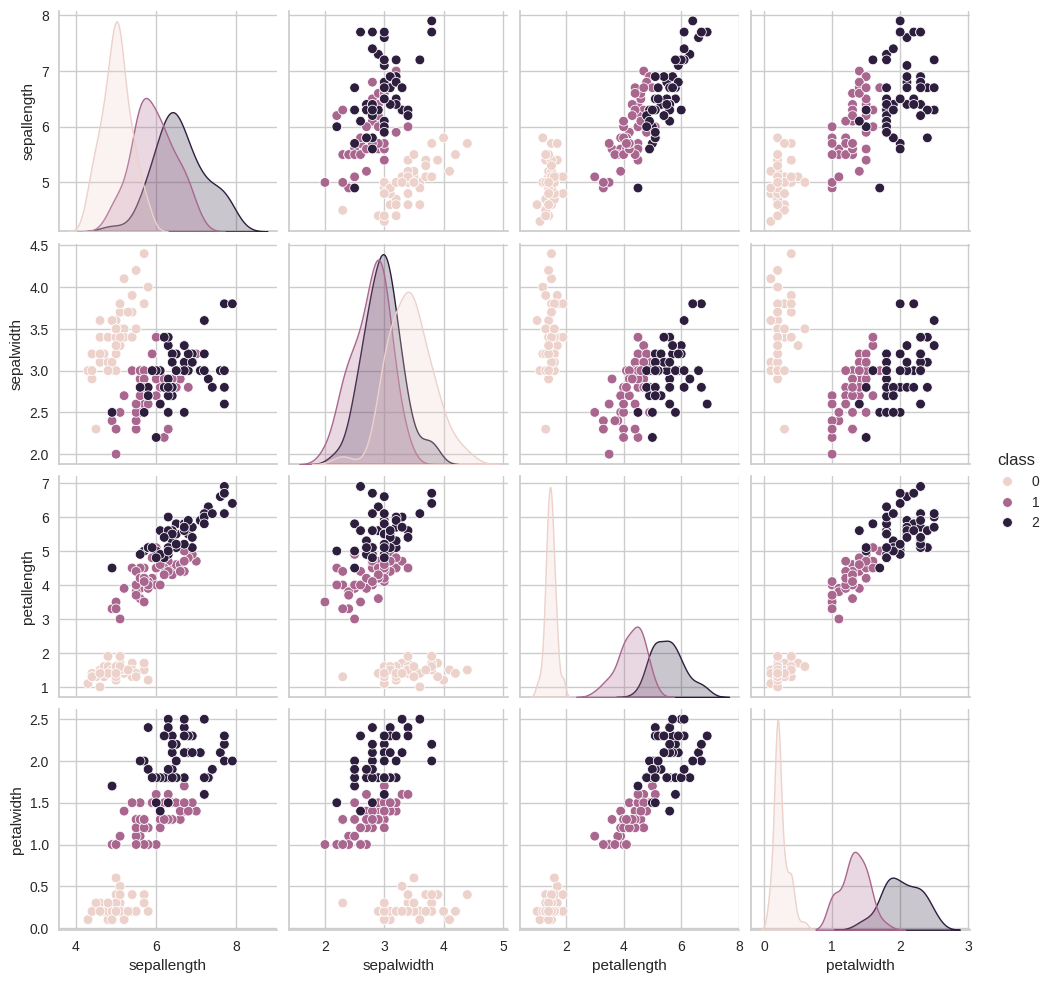

In [113]:
sns.pairplot(data=data, hue = "class", corner = False,
             diag_kws = {"linewidth":1, "fill":True},
             plot_kws = dict(marker = "o"))

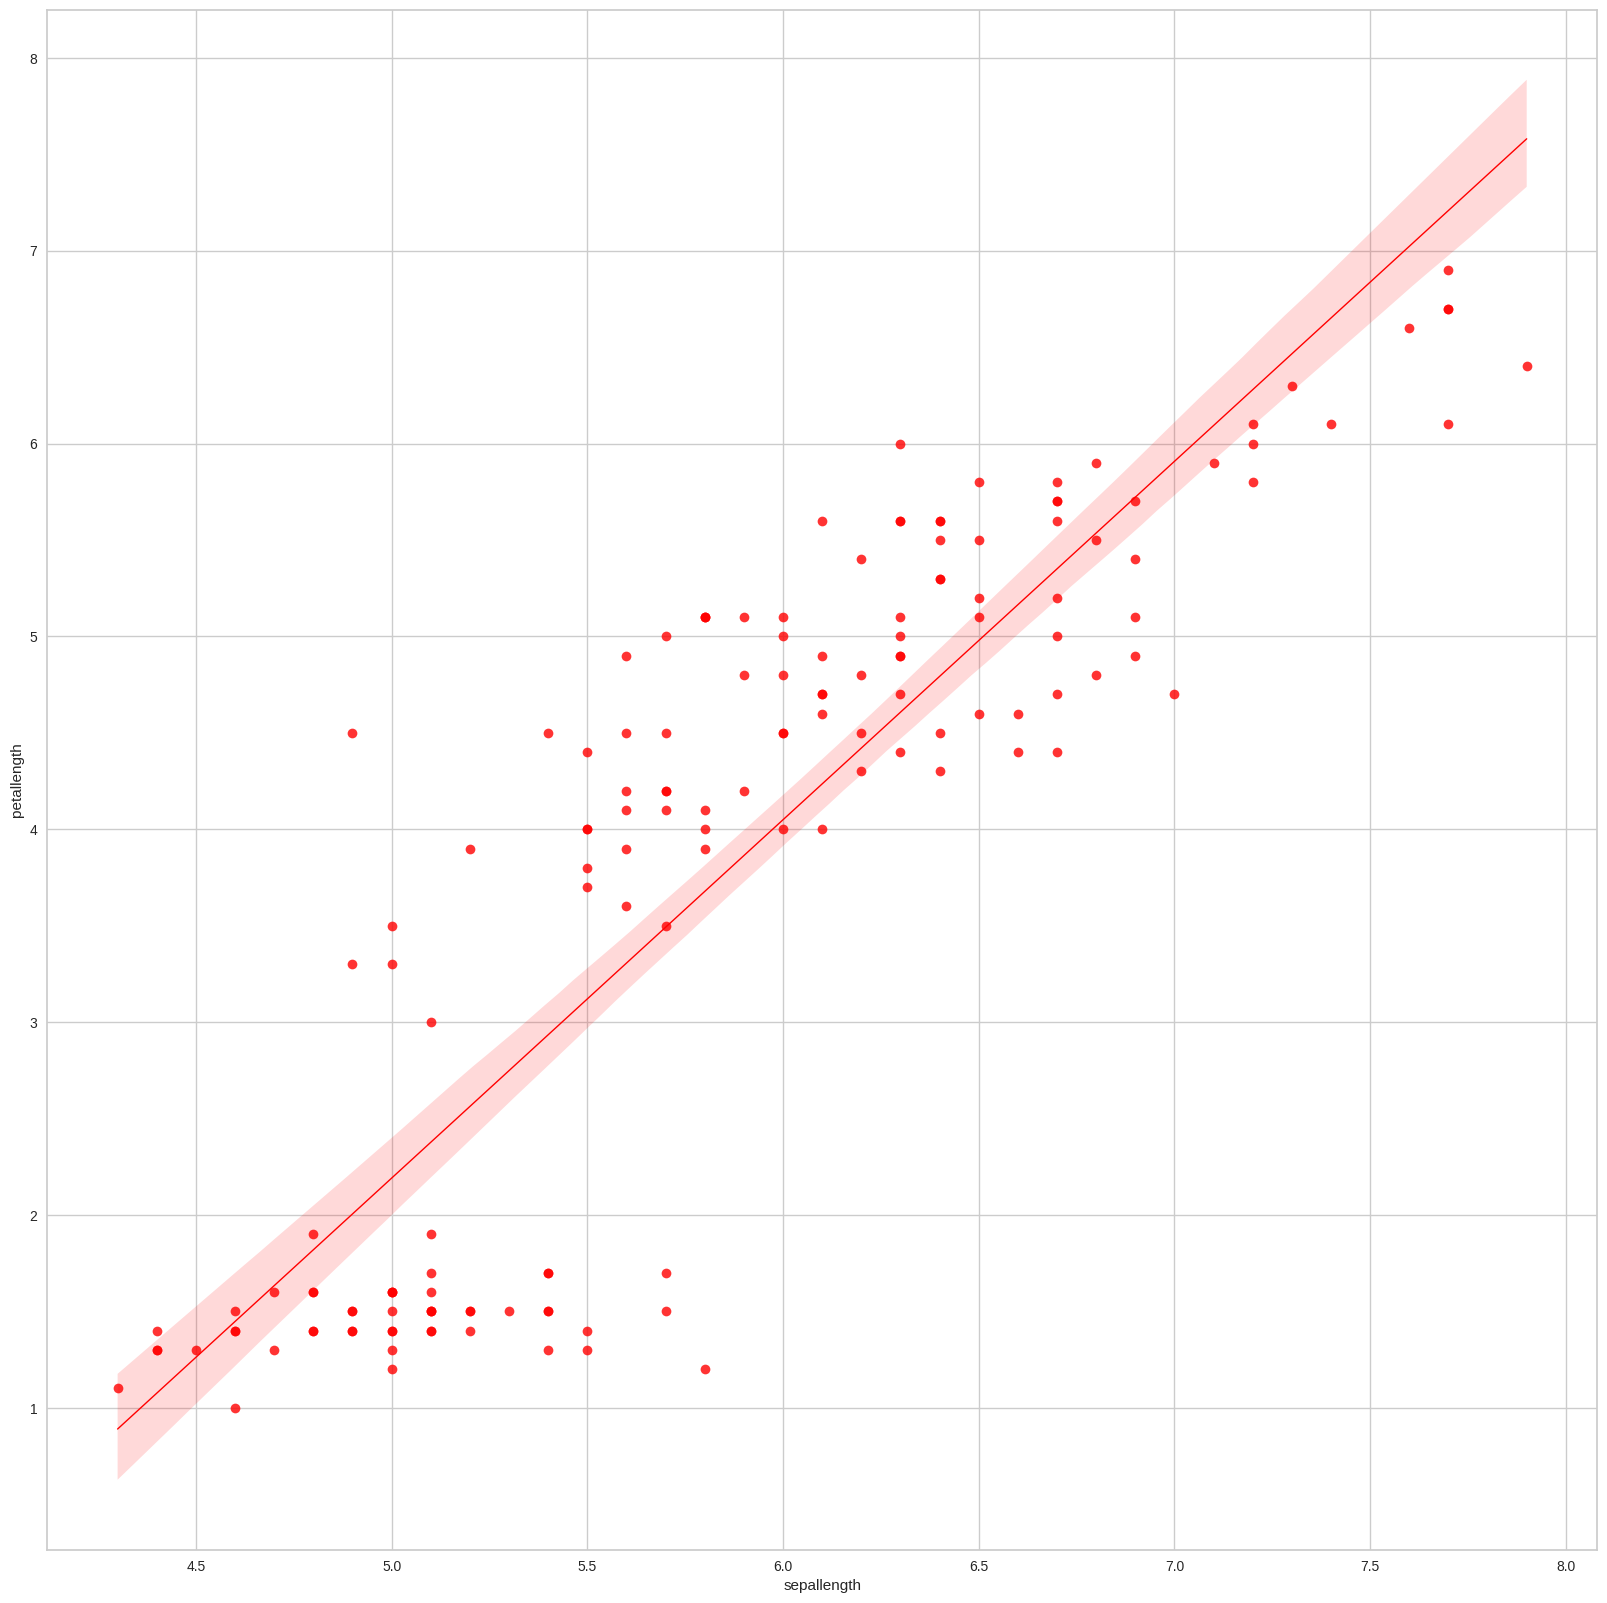

In [114]:
sns.regplot(data = data, x="sepallength", y="petallength",
            line_kws = dict(linewidth = 1), ci = 95, scatter = True,
            color = "red")
plt.grid(True)

Text(0.5, 0, 'petallength in cm')

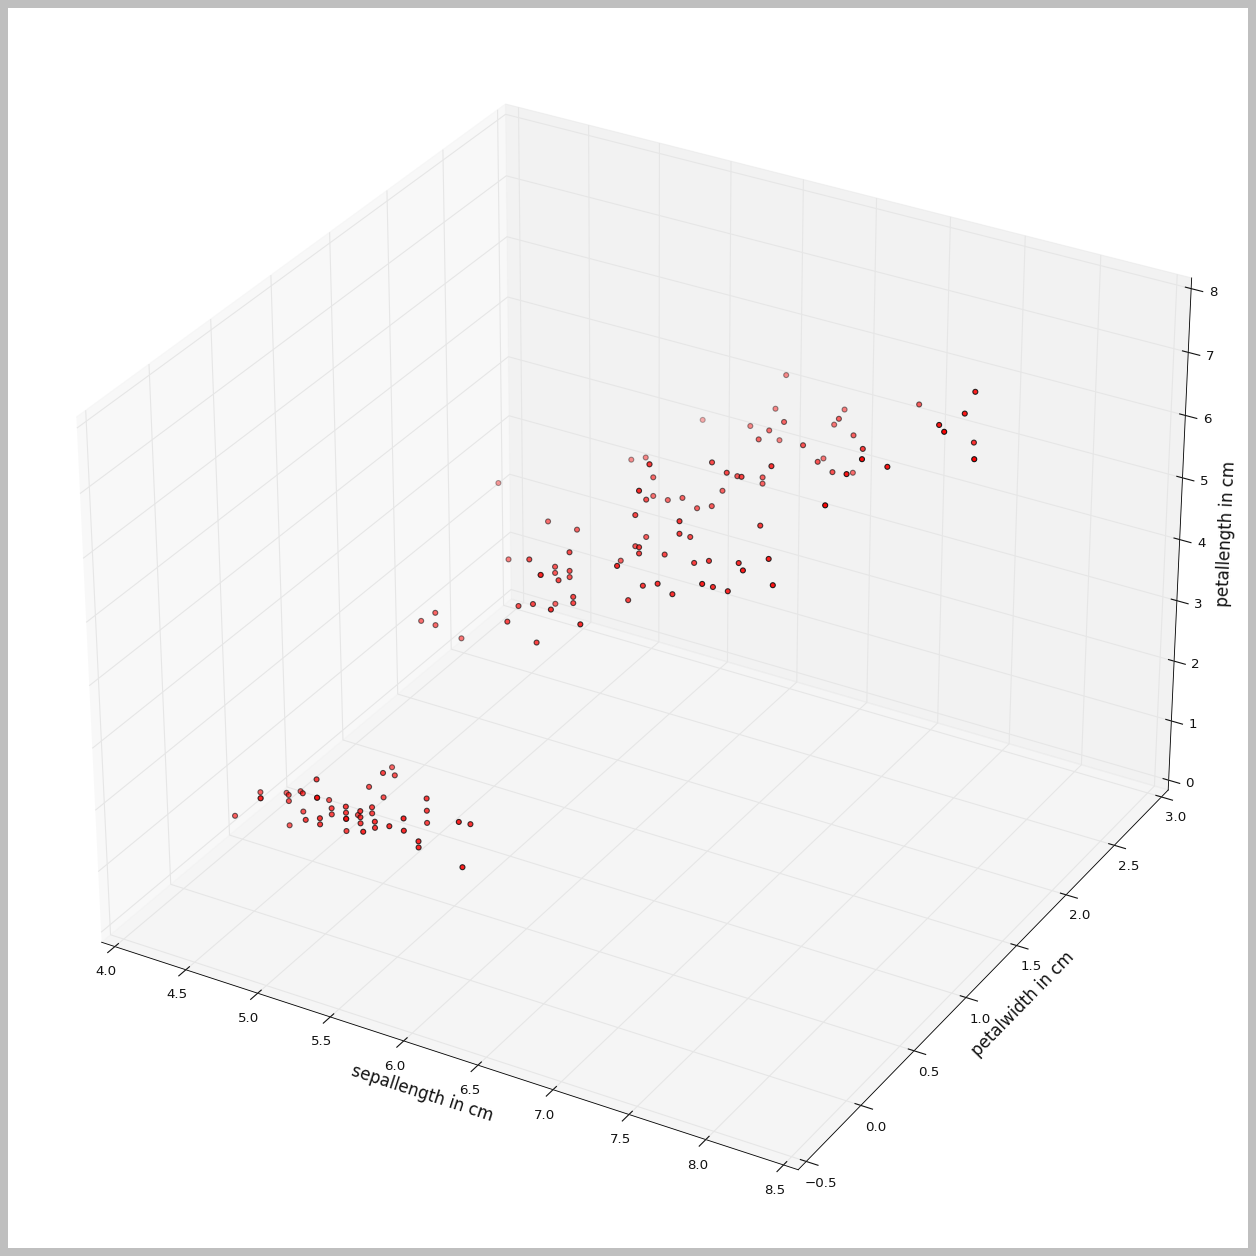

In [118]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,20))
plt.style.use("classic")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["sepallength"], data["petalwidth"],data["petallength"], c = "red")
ax.set_xlabel("sepallength in cm", fontsize = 15)
ax.set_ylabel("petalwidth in cm", fontsize = 15)
ax.set_zlabel("petallength in cm", fontsize = 15)

<Axes: >

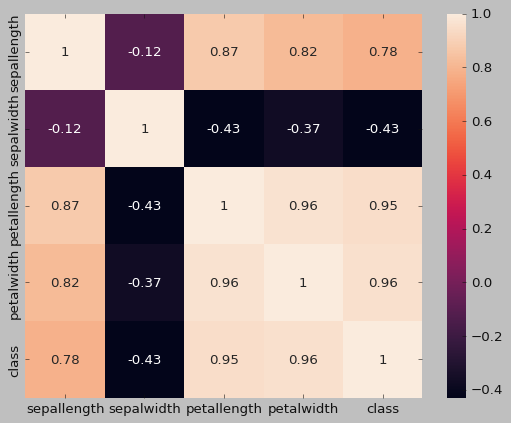

In [137]:
corr = data.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, annot = True, ax = ax)

In [123]:
# Logistic Regression, Decision Tree, K Neighbors, Naive Bayes, SVC and Linear Discriminant are Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# KFold and Cross_Val_Score for Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [124]:
# All the Models will be stored in this models list.
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))

print("Model Accuracy")

# Evaluating each Models
names = []
accuracy = []
for name, model in models:

    # 15 Cross Fold Validation for each Models
    kfold = KFold(n_splits=15)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # Displaying the Accuracy of each Model in Validation
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: Accuracy = %f" % (name, cv_results.mean())
    print(msg)


Model Accuracy
LR: Accuracy = 0.941667
LDA: Accuracy = 0.975000
CART: Accuracy = 0.900000
KNN: Accuracy = 0.958333
GNB: Accuracy = 0.941667
SVC: Accuracy = 0.958333


In [125]:

models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))

In [131]:
# Accuracy Score, Classification Report and Confusion Matrix is for Analysis of Models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [132]:
def test_model(model):
    # Training the Dataset with Training Set
    model.fit(X_train, y_train)

    # Predicting the Values with Testing Set
    predictions = model.predict(X_test)

    # Model Testing Results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [133]:
# Predicting the Values
for name, model in models:
    print("----------------")
    print("Testing:", name)
    test_model(model)

----------------
Testing: LR
Accuracy: 1.0
Confusion Matrix:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

----------------
Testing: LDA
Accuracy: 1.0
Confusion Matrix:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00       

In [135]:
import pickle

In [136]:
for name, model in models:
    filename = name + ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
